# Numerical Simulation Laboratory
## Exercise Sheet 8

### Exercise 08.1-2
We use a variational Monte Carlo program that approximates the ground state of a 1D quantum particle in a potential 

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

by optimizing the parameters of the trial wave function 

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

For each value of $\mu$ and $\sigma$, the program calculates the expectation value of the Hamiltonian by Monte Carlo sampling, and then attempts to find the optimal values of $\mu$ and $\sigma$ using a basic Simulated Annealing loop.
The following graphs show the estimation of the value of $\langle {\hat H} \rangle_T$ via data-blocking, and a sampling of the wavefunction, both using the final values of $\mu$ and $\sigma$ resulting from the optimization loop.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
a, b, err = np.loadtxt('02/his.out', unpack=True, skiprows=2)
plt.errorbar(a,b, yerr=err, errorevery=2)
plt.xlabel('data block #')
plt.ylabel('energy')
plt.title(r'Estimation of $\langle {\hat H} \rangle_T$')
plt.show()
print('final estimation: energy =',b[-1])

<Figure size 640x480 with 1 Axes>

final estimation: energy = -0.181135


final variational parameters: mu = 0.792346 sigma = 0.693158
final variational energy = -0.181135
Ground state energy with finite differences method:  -0.46046587969271563


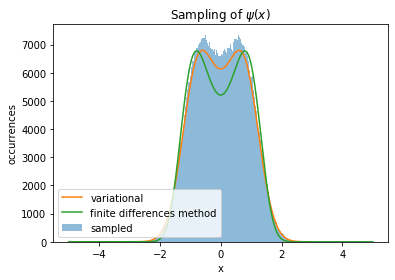

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nbins = 150
dat = np.loadtxt('02/sample.out')
plt.hist(dat, bins = nbins, label='sampled', alpha=0.5)

def f(x, mu, sigma):
    return ( np.exp( - ((x -mu )**2) /(2* sigma**2 )) + np.exp( - ((x +mu )**2) /(2* sigma**2 )))

bb = 3
xr = np.arange(-bb, bb, 0.02)
m, s = np.loadtxt('02/par.out', unpack=True, skiprows=1)
print('final variational parameters: mu =',m,'sigma =',s)
print('final variational energy =',b[-1])
yr = f(xr, m, s)**2 *len(dat)/nbins *1.7 #f is still not normalized, but this keeps the orders of magnitude similar
plt.plot(xr, yr, label='variational')
plt.xlabel('x')
plt.ylabel('occurrences')
plt.title(r'Sampling of $\psi (x)$')

##### matrix equation result ####
def Vpot(x):
    return (x**2 - 2.5)*x**2
hbar = 1 ; m = 1 ; a = 10 ; N = 1000
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
plt.plot(x,(psi[0])**2 *len(dat)/nbins*5.2, label="finite differences method")
print("Ground state energy with finite differences method: ", E[0])

plt.legend(loc='lower left')
plt.show()

The wavefunctions from the two methods are qualitatively similar, but there is a noticeable difference in the computed energies. 

### Exercise 08.3
We use the PIMC/PIGS code to study the same system. At $T=0$, we try running the code projecting first a constant trial wave function, $\Psi_T(x)=1$, and then the variational wave function we found with our previous approach. 

variational energy = -0.181135
PIGS energy =  -0.307114


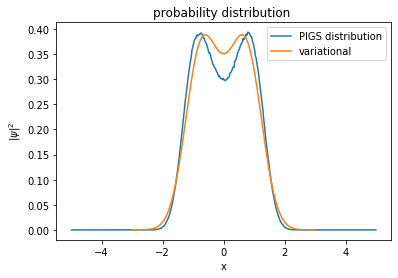

In [3]:
import numpy as np
import matplotlib.pyplot as plt

us1, pigsek, us2 = np.loadtxt('QMC_1D/res/T0/const/kinetic.dat', unpack=True)
us1, pigsepot, us2 = np.loadtxt('QMC_1D/res/T0/const/potential.dat', unpack=True)
print('variational energy =',b[-1])
print('PIGS energy = ', pigsek[-2]+pigsepot[-1])


x, pigs, err = np.loadtxt('QMC_1D/res/T0/const/probability.dat', unpack=True)
plt.plot(x, pigs, label='PIGS distribution')
plt.plot(xr, yr/17500, label='variational')
plt.xlabel('x')
plt.ylabel(' $| \psi|^2$ ')
plt.title(r'probability distribution ')
plt.legend()
plt.show()

variational energy = -0.181135
PIGS energy =  -0.19368300000000005


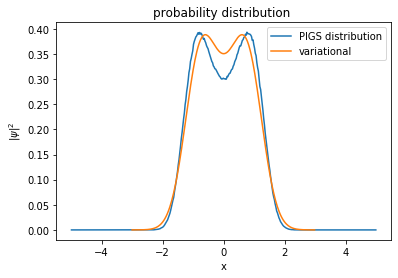

In [4]:
import numpy as np
import matplotlib.pyplot as plt

us1, pigsek, us2 = np.loadtxt('QMC_1D/res/T0/var/kinetic.dat', unpack=True)
us1, pigsepot, us2 = np.loadtxt('QMC_1D/res/T0/var/potential.dat', unpack=True)
print('variational energy =',b[-1])
print('PIGS energy = ', pigsek[-2]+pigsepot[-1])


x, pigs, err = np.loadtxt('QMC_1D/res/T0/var/probability.dat', unpack=True)
plt.plot(x, pigs, label='PIGS distribution')
plt.plot(xr, yr/17500, label='variational')
plt.xlabel('x')
plt.ylabel(' $| \psi|^2$ ')
plt.title(r'probability distribution ')
plt.legend()
plt.show()

Although the wavefunction looks similar as before, the value of the energy tells us that the efficiency was worse, and this time it didn't improve the variational result by very much. The similarity of the result seems to suggest that starting the PIGS algorithm in the variational wavefunction caused the sampling in the PIGS to get stuck in a local minimum of some sort.

Last, we use the PIGS/PIMC code at finite temperature to observe the change of the wavefunction shape for $ T > 0$.

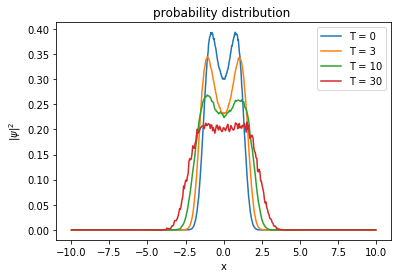

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x0, pigs0, err = np.loadtxt('QMC_1D/res/T0/var/probability.dat', unpack=True)
plt.plot(x0, pigs0, label='T = 0')

x2, pigs2, err = np.loadtxt('QMC_1D/res/Tf/3/probability.dat', unpack=True)
plt.plot(x2, pigs2, label='T = 3')

x3, pigs3, err = np.loadtxt('QMC_1D/res/Tf/10/probability.dat', unpack=True)
plt.plot(x3, pigs3, label='T = 10')

x3, pigs3, err = np.loadtxt('QMC_1D/res/Tf/30/probability.dat', unpack=True)
plt.plot(x3, pigs3, label='T = 30')


plt.xlabel('x')
plt.ylabel(' $| \psi|^2$ ')
plt.title(r'probability distribution ')
plt.legend()
plt.show()

We can see how the two peaks in the distribution smear out, as the rising temperature favors minimization of entropy over minimization of energy.